<a href="https://colab.research.google.com/github/VidarSnjor/LV/blob/main/Lokaverkefni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 6.0 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=50503c52fbf6d54744c5100e72637219693cbc9a5d7a84a9089b39e38d32d473
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [ ]:
import math
import numpy as np
import pandas as pd
from datetime import date, timedelta, datetime
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional 
#from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import csv
import os

In [ ]:
import yfinance as yf
yf.pdr_override()

In [ ]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

In [ ]:
kw_list = ["Gamestop"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

In [ ]:
data_google = pytrends.interest_over_time()

In [ ]:
data_google.index = pd.DatetimeIndex(data_google.index) + pd.DateOffset(1)
data_google

,Gamestop,isPartial
date,,
2017-04-24,10,False
2017-05-01,9,False
2017-05-08,8,False
2017-05-15,9,False
2017-05-22,8,False
...,...,...
2022-03-21,6,False
2022-03-28,6,False
2022-04-04,6,False


In [ ]:
df = yf.download('GME', period='5y', interval = "1wk")
df = df.join(data_google['Gamestop'])
df.dropna(inplace=True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Gamestop
Date,,,,,,,
2017-04-24,23.400000,23.980000,22.469999,22.690001,18.737082,12444300.0,10.0
2017-05-01,22.770000,24.139999,22.559999,24.000000,19.818861,10294900.0,9.0
2017-05-08,24.000000,25.309999,23.780001,24.030001,19.843632,11443000.0,8.0
2017-05-15,24.139999,24.680000,23.520000,24.219999,20.000534,10799600.0,9.0
2017-05-22,24.350000,24.600000,21.250000,22.219999,18.348963,32489300.0,8.0
...,...,...,...,...,...,...,...
2022-03-21,90.000000,158.160004,89.760002,151.949997,151.949997,66054200.0,6.0
2022-03-28,151.979996,199.410004,151.539993,165.000000,165.000000,67901300.0,6.0
2022-04-04,166.979996,173.240005,141.570007,146.190002,146.190002,19062100.0,6.0


In [ ]:
df.index = pd.to_datetime(df.index)
df

,Open,High,Low,Close,Adj Close,Volume,Gamestop
Date,,,,,,,
2017-04-24,23.400000,23.980000,22.469999,22.690001,18.737082,12444300.0,10.0
2017-05-01,22.770000,24.139999,22.559999,24.000000,19.818861,10294900.0,9.0
2017-05-08,24.000000,25.309999,23.780001,24.030001,19.843632,11443000.0,8.0
2017-05-15,24.139999,24.680000,23.520000,24.219999,20.000534,10799600.0,9.0
2017-05-22,24.350000,24.600000,21.250000,22.219999,18.348963,32489300.0,8.0
...,...,...,...,...,...,...,...
2022-03-21,90.000000,158.160004,89.760002,151.949997,151.949997,66054200.0,6.0
2022-03-28,151.979996,199.410004,151.539993,165.000000,165.000000,67901300.0,6.0
2022-04-04,166.979996,173.240005,141.570007,146.190002,146.190002,19062100.0,6.0


In [ ]:
data_ext = df.copy()
data_ext['Prediction'] = data_ext['Close']
data_ext.tail()

,Open,High,Low,Close,Adj Close,Volume,Gamestop,Prediction
Date,,,,,,,,
2022-03-21,90.000000,158.160004,89.760002,151.949997,151.949997,66054200.0,6.0,151.949997
2022-03-28,151.979996,199.410004,151.539993,165.000000,165.000000,67901300.0,6.0,165.000000
2022-04-04,166.979996,173.240005,141.570007,146.190002,146.190002,19062100.0,6.0,146.190002
2022-04-11,143.039993,156.500000,140.610001,150.770004,150.770004,8958600.0,5.0,150.770004
2022-04-18,150.000000,151.240005,137.240005,141.460007,141.460007,2467800.0,0.0,141.460007


In [ ]:
nrows = df.shape[0]
np_data_unscaled = np.array(df)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
np_data_unscaled.shape

(261, 7)

In [ ]:
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

In [ ]:
sequence_length = 1
index_Close = df.columns.get_loc("Close")
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len:, :]

def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(0, data_len):
        x.append(data[i,:]) 
        y.append(data[i, index_Close]) 
    
    x = np.array(x)
    y = np.array(y)
    return x, y

x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(209, 7) (209,)
(52, 7) (52,)


In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(x_train, y_train, batch_size=5, epochs=36, validation_data=(x_test, y_test))

Epoch 1/36
42/42 [==============================] - 13s 66ms/step - loss: 0.0086 - val_loss: 0.0105
Epoch 2/36
42/42 [==============================] - 1s 15ms/step - loss: 0.0020 - val_loss: 0.0090
Epoch 3/36
42/42 [==============================] - 1s 15ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 4/36
42/42 [==============================] - 1s 14ms/step - loss: 0.0010 - val_loss: 0.0202
Epoch 5/36
42/42 [==============================] - 1s 14ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/36
42/42 [==============================] - 1s 14ms/step - loss: 0.0032 - val_loss: 0.0458
Epoch 7/36
42/42 [==============================] - 1s 15ms/step - loss: 0.0019 - val_loss: 0.0066
Epoch 8/36
42/42 [==============================] - 1s 15ms/step - loss: 9.7918e-04 - val_loss: 0.0025
Epoch 9/36
42/42 [==============================] - 1s 14ms/step - loss: 9.6761e-04 - val_loss: 0.0014
Epoch 10/36
42/42 [==============================] - 1s 14ms/step - loss: 0.0014 - val_loss: 0.0069


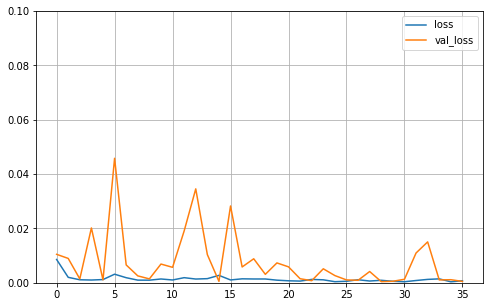

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0, 0.1)
plt.show()

In [ ]:
y_pred_scaled = model.predict(x_test)

y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 5.42
Mean Absolute Percentage Error (MAPE): 3.34 %
Median Absolute Percentage Error (MDAPE): 2.3 %


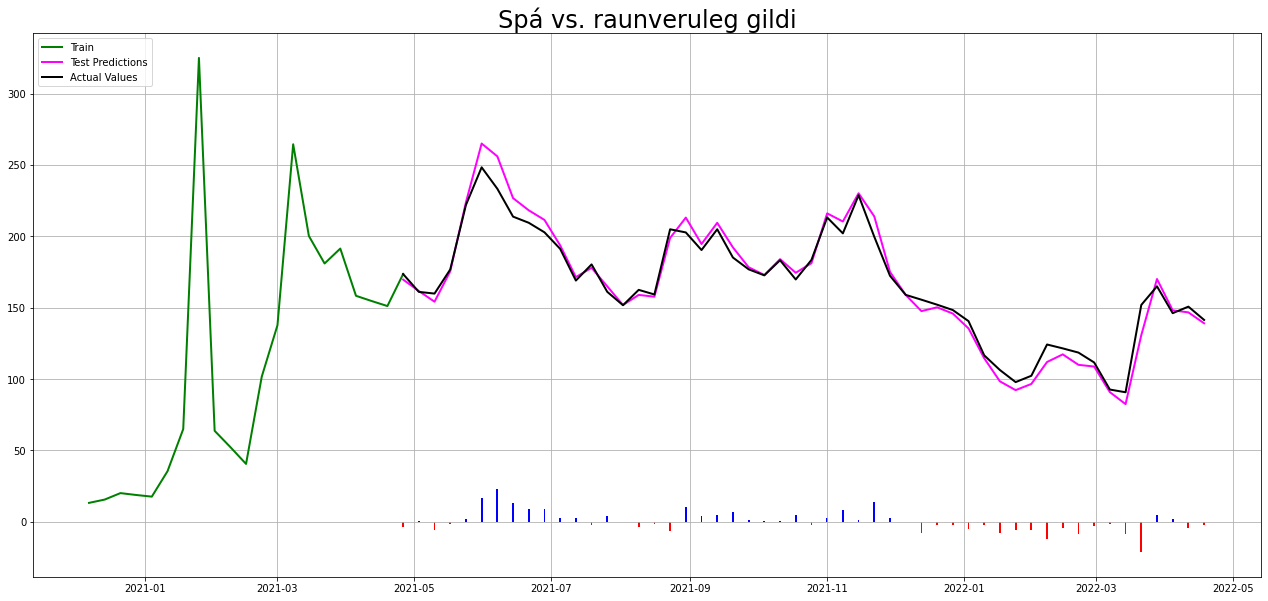

In [ ]:
display_start_date = pd.Timestamp('today') - timedelta(days=500)

data_sub = df.copy()
data_sub.index = df.index

train = df[:train_data_len + 1]
valid = df[train_data_len:]
valid.insert(1, "Prediction", y_pred.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

valid = valid[valid.index > display_start_date]
train = train[train.index > display_start_date]

fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train.index; yt = train[["Close"]]
xv = valid.index; yv = valid[["Close", "Prediction"]]
plt.title("Spá vs. raunveruleg gildi", fontsize=24)

plt.plot(xt, yt, color="green", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="magenta", linewidth=2.0)
plt.plot(xv, yv["Close"], color="black", linewidth=2.0)
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

# # Create the bar plot with the differences
x = valid.index
y = valid["Difference"]

valid.loc[y >= 0, 'diff_color'] = "blue"
valid.loc[y < 0, 'diff_color'] = "red"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
plt.grid()
plt.show()

In [ ]:
yv

,Close,Prediction
Date,,
2021-04-26,173.589996,169.722687
2021-05-03,161.110001,161.704544
2021-05-10,159.919998,154.237061
2021-05-17,176.789993,175.502304
2021-05-24,222.000000,223.828766
2021-05-31,248.360001,265.026550
2021-06-07,233.339996,256.032715
2021-06-14,213.820007,226.781403
2021-06-21,209.509995,218.237656


In [ ]:
todays_date = date.today()
index_framtid = pd.date_range(todays_date, periods=10, freq='W')
 
columns_framtid = df.columns
 
df_framtid = pd.DataFrame(index=index_framtid, columns=columns_framtid)
df_framtid = df_framtid.fillna(0)
df_framtid = df.append(df_framtid)
df_framtid

,Open,High,Low,Close,Adj Close,Volume,Gamestop
2017-04-24,23.400000,23.980000,22.469999,22.690001,18.737082,12444300.0,10.0
2017-05-01,22.770000,24.139999,22.559999,24.000000,19.818861,10294900.0,9.0
2017-05-08,24.000000,25.309999,23.780001,24.030001,19.843632,11443000.0,8.0
2017-05-15,24.139999,24.680000,23.520000,24.219999,20.000534,10799600.0,9.0
2017-05-22,24.350000,24.600000,21.250000,22.219999,18.348963,32489300.0,8.0
...,...,...,...,...,...,...,...
2022-05-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2022-06-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2022-06-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2022-06-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [ ]:
df_framtid = df_framtid.tail(len(df_framtid)-10)
df_framtid

,Open,High,Low,Close,Adj Close,Volume,Gamestop
2017-07-03,21.770000,22.000000,20.860001,20.910000,17.561554,7457800.0,11.0
2017-07-10,20.889999,21.430000,20.790001,21.020000,17.653938,6880500.0,10.0
2017-07-17,21.030001,21.580000,20.719999,20.780001,17.452372,9236500.0,10.0
2017-07-24,20.700001,21.760000,20.650000,21.500000,18.057072,10532800.0,9.0
2017-07-31,21.549999,22.110001,21.139999,21.930000,18.418213,7728600.0,9.0
...,...,...,...,...,...,...,...
2022-05-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2022-06-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2022-06-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2022-06-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [ ]:
nrows = df_framtid.shape[0]
np_data_unscaled = np.array(df_framtid)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
np_data_unscaled.shape

(261, 7)

In [ ]:
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(df_framtid['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

In [ ]:
index_Close = df_framtid.columns.get_loc("Close")
train_data_len = len(df_framtid)-10

train_data = np_data_scaled[0:train_data_len, :]

x_train, y_train = partition_dataset(sequence_length, train_data)

In [ ]:
y_pred_scaled = model.predict(x_train)

y_pred = scaler_pred.inverse_transform(y_pred_scaled)

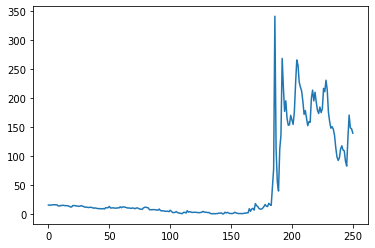

In [ ]:
plt.plot(y_pred)